# Final project: Bankruptcy prediction

# Objectives


>- Exploratory Data Analysis
>- Feature Engineering
>- Creating, testing and evaluating models
>- Error analysis
and Prediction **using Neural Networks, Extreme Gradient Boosting and many more..**.


- Bankruptcy prediction is the task of predicting bankruptcy and various measures of financial distress of firms. 
- It is a vast area of finance and accounting research. The importance of the area is due in part to the relevance for creditors and investors in evaluating the likelihood that a firm may go bankrupt. 
- The aim of predicting financial distress is to develop a predictive model that combines various econometric parameters which allow foreseeing the financial condition of a firm.
- In this domain various methods were proposed that were based on statistical hypothesis testing, statistical modeling (e.g., generalized linear models), and recently artificial intelligence (e.g., neural networks, Support Vector Machines, decision trees). 
- In this paper we document our observations as we explore, build, and compare, some of the widely used classification models: Extreme Gradient Boosting for Decision Trees, Random Forests, Naïve Bayes, Balanced Bagging and Logistic Regression, pertinent to bankruptcy prediction.
- We have chosen the Polish companies’ bankruptcy data set where synthetic features were used to reflect higher-order statistics. A synthetic feature is a combination of the econometric measures using arithmetic operations (addition, subtraction, multiplication, division). 
- We begin by carrying out data preprocessing and exploratory analysis where we impute the missing data values using some of the popular data imputation techniques like Mean, k-Nearest Neighbors. To address the data imbalance issue, we apply Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class labels.
- Later, we model the data using StratifiedKFold Validation on the said models, and the imputed and resampled datasets. Finally, we analyze and evaluate the performance of the models on the validation datasets using several metrics such as accuracy, precision, recall, etc., and rank the models accordingly. Towards the end, we discuss the challenges we faced and suggest ways to improve the prediction, including scope for future work. 

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
import mglearn

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.tree import export_graphviz
import graphviz
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [2]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [3]:
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict

from tensorflow.python.keras.models import load_model
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
import lightgbm as lgb
import eli5
import time
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, train_test_split

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# import lightgbm as lgb
from bayes_opt import BayesianOptimization
# import xgboost as xgb
# from xgboost import XGBClassifier
# import pickle
random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.io import arff
import missingno as msno
# from sklearn.preprocessing import Imputer
#import fancyimpute
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier


# 2. Importing and organizing the data

The data directory will contain one file per year.
- There are 5 years refered to as 1 through 5
- Files named: `1st_yr.csv,  2nd_yr.csv,  3rd_yr.csv,  4th_yr.csv,  5th_yr.csv`
- Let $i \in \{1, 2, 3, 4, 5 \}$.  The data in the file for year $-i$ contains
    - contains company characteristics for year $i$
    - the Bankruptcy field indicates whether the company is Bankrupt/Not Bankrupt in **year 6**
        - for year 1 (`1st.csv`), whether the company survives for 5 more years to **year 6**
        - for year 2 (`2nd.csv`), whether the company survives for 4 more years to **year 6**
        - and so forth

        
By comparison: for the Midterm project you were given data for year 5.
- the single file for the Midterm project indicated survival in the year ahead

You will need to 
- decide which files and which fields to use
- prepare the data for training and testing


### Attribute Information:
  
Id Company Identifier  
X1 net profit / total assets  
X2 total liabilities / total assets  
X3 working capital / total assets  
X4 current assets / short-term liabilities  
X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365  
X6 retained earnings / total assets  
X7 EBIT / total assets  
X8 book value of equity / total liabilities  
X9 sales / total assets  
X10 equity / total assets  
X11 (gross profit + extraordinary items + financial expenses) / total assets  
X12 gross profit / short-term liabilities  
X13 (gross profit + depreciation) / sales  
X14 (gross profit + interest) / total assets  
X15 (total liabilities * 365) / (gross profit + depreciation)  
X16 (gross profit + depreciation) / total liabilities  
X17 total assets / total liabilities  
X18 gross profit / total assets  
X19 gross profit / sales  
X20 (inventory * 365) / sales  
X21 sales (n) / sales (n-1)  
X22 profit on operating activities / total assets  
X23 net profit / sales  
X24 gross profit (in 3 years) / total assets  
X25 (equity - share capital) / total assets  
X26 (net profit + depreciation) / total liabilities  
X27 profit on operating activities / financial expenses  
X28 working capital / fixed assets  
X29 logarithm of total assets  
X30 (total liabilities - cash) / sales  
X31 (gross profit + interest) / sales  
X32 (current liabilities * 365) / cost of products sold  
X33 operating expenses / short-term liabilities  
X34 operating expenses / total liabilities  
X35 profit on sales / total assets  
X36 total sales / total assets  
X37 (current assets - inventories) / long-term liabilities  
X38 constant capital / total assets  
X39 profit on sales / sales  
X40 (current assets - inventory - receivables) / short-term liabilities  
X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))  
X42 profit on operating activities / sales  
X43 rotation receivables + inventory turnover in days  
X44 (receivables * 365) / sales  
X45 net profit / inventory  
X46 (current assets - inventory) / short-term liabilities  
X47 (inventory * 365) / cost of products sold  
X48 EBITDA (profit on operating activities - depreciation) / total assets  
X49 EBITDA (profit on operating activities - depreciation) / sales  
X50 current assets / total liabilities  
X51 short-term liabilities / total assets  
X52 (short-term liabilities * 365) / cost of products sold)  
X53 equity / fixed assets  
X54 constant capital / fixed assets  
X55 working capital  
X56 (sales - cost of products sold) / sales  
X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  
X58 total costs /total sales  
X59 long-term liabilities / equity  
X60 sales / inventory  
X61 sales / receivables  
X62 (short-term liabilities *365) / sales  
X63 sales / short-term liabilities  
X64 sales / fixed assets  


#### Dataset Quality Assessment 
Now we move on to assessing the quality of the dataset. As we have mentioned earlier, the dataset suffers from missing values and data imbalance. 

In [6]:
os.getcwd()

'D:\\Online_courses\\iNeuron\\iNeuron_Hackathon\\1_Machine_Learning_Challenge\\ML_Challenge_1\\Bankruptcy dataset\\Bankruptcy-Prediction-using-Machine-Learning-master'

In [7]:
DATA_PATH = "D:/Online_courses/iNeuron/iNeuron_Hackathon/1_Machine_Learning_Challenge/ML_Challenge_1/Bankruptcy dataset/train_data"

### Import multiple csv files into pandas and concatenate into one DataFrame


In [8]:
# all data files from each path stored in each dictionary
def data_reading(PATH):
    data_files = {}
    
    for file_name in os.listdir(PATH):
        print("Reading file: ", file_name)
        
        curr_table = pd.read_csv(os.path.join(PATH, file_name), low_memory=False)
        curr_table.replace('?', np.nan, inplace = True)
        curr_table.iloc[:, :-1] = curr_table.iloc[:, :-1].astype(np.float64)
        print(type(curr_table))
        # fill missing value with mean
#         imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#         curr_table.loc[:, curr_table.columns!='Bankrupt'] = imp_mean.fit_transform(curr_table.loc[:, curr_table.columns!='Bankrupt'])
        
        # save
        
        data_files[file_name[:-4]] = curr_table
    
    print("Finished Reading for Folder: ", PATH)
    return data_files

In [9]:
train_files = data_reading(DATA_PATH)

Reading file:  1year.csv
<class 'pandas.core.frame.DataFrame'>
Reading file:  2year.csv
<class 'pandas.core.frame.DataFrame'>
Reading file:  3year.csv
<class 'pandas.core.frame.DataFrame'>
Reading file:  4year.csv
<class 'pandas.core.frame.DataFrame'>
Finished Reading for Folder:  D:/Online_courses/iNeuron/iNeuron_Hackathon/1_Machine_Learning_Challenge/ML_Challenge_1/Bankruptcy dataset/train_data


In [10]:
train_files['4year']

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.096557,0.137180,0.852800,7.21680,710.6700,0.000000,0.096557,6.28990,0.61457,0.86282,...,0.320180,0.111910,0.70637,0.000000,21.9300,3.9111,81.471,4.4801,61.28400,0
1,0.304580,0.136860,0.755670,6.69830,93.5030,0.000000,0.376020,6.30700,2.49970,0.86314,...,0.148740,0.352870,0.85001,0.000000,13.9420,5.7112,19.364,18.8490,22.37600,0
2,0.134950,0.168660,0.712950,5.22720,432.4800,0.000000,0.176530,4.92920,0.76021,0.83134,...,0.199750,0.162330,0.85872,0.000000,1828.5000,2.1565,80.978,4.5074,6.42120,0
3,0.267750,0.113410,0.789310,8.04050,213.6700,0.000000,0.332610,7.81760,1.70250,0.88659,...,0.195400,0.302000,0.80466,0.000000,NaN,5.9366,24.035,15.1860,17.27000,0
4,0.046283,0.094199,0.471720,7.66220,88.8090,0.000000,0.046283,9.61580,1.13950,0.90580,...,0.030021,0.051096,0.95994,0.000000,6.7301,7.5983,22.681,16.0930,2.49080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,0.004676,0.549490,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,1
9535,-0.027610,0.607480,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,1
9536,-0.238290,0.627080,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,1
9537,0.097188,0.753000,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,1


In [11]:
train_files['2year'].describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10172.000000,10172.000000,10172.000000,10151.000000,10149.000000,10172.000000,10172.000000,10155.000000,10169.000000,10172.000000,...,10110.000000,10171.000000,10134.000000,10171.000000,9630.000000,10157.000000,1.011000e+04,10151.000000,9961.000000,10173.000000
mean,0.043074,0.646960,0.070861,4.144058,-144.830797,-0.111564,0.122101,9.868798,2.867541,0.344341,...,-1.128949,-0.043519,12.656337,3.034738,375.332514,16.884020,8.910799e+02,11.217653,55.275877,0.039320
std,1.112028,6.615405,6.606495,51.715242,7811.976260,6.568088,6.532490,288.386870,96.674595,6.655844,...,86.502920,12.251651,632.937400,238.185655,12294.315980,295.762312,4.366133e+04,233.919213,1526.588333,0.194364
min,-75.331000,0.000000,-479.960000,0.002079,-438250.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000
25%,0.000364,0.277695,0.012114,1.029200,-50.131000,0.000000,0.001975,0.393635,1.026300,0.277365,...,0.010381,0.009959,0.872130,0.000000,5.684275,4.695300,4.028225e+01,3.102200,2.310900,0.000000
50%,0.049493,0.487335,0.189695,1.524400,-1.907500,0.000000,0.060057,1.005400,1.285700,0.490925,...,0.055013,0.126210,0.949715,0.004849,10.353500,6.988600,6.964550e+01,5.198900,4.536000,0.000000
75%,0.141105,0.705040,0.400400,2.741100,51.443000,0.074739,0.165865,2.518850,2.256600,0.703280,...,0.134068,0.309135,0.993390,0.249240,22.163500,11.073000,1.163200e+02,9.012550,10.604000,0.000000
max,7.372700,480.960000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,20.200000,147.190000,59672.000000,23853.000000,639940.000000,26862.000000,4.144800e+06,23454.000000,127680.000000,1.000000


In [12]:
# train_files['5year'].shape

In [13]:
train_files['2year'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
Attr1     10172 non-null float64
Attr2     10172 non-null float64
Attr3     10172 non-null float64
Attr4     10151 non-null float64
Attr5     10149 non-null float64
Attr6     10172 non-null float64
Attr7     10172 non-null float64
Attr8     10155 non-null float64
Attr9     10169 non-null float64
Attr10    10172 non-null float64
Attr11    10172 non-null float64
Attr12    10151 non-null float64
Attr13    10110 non-null float64
Attr14    10172 non-null float64
Attr15    10161 non-null float64
Attr16    10154 non-null float64
Attr17    10155 non-null float64
Attr18    10172 non-null float64
Attr19    10109 non-null float64
Attr20    10110 non-null float64
Attr21    7009 non-null float64
Attr22    10172 non-null float64
Attr23    10110 non-null float64
Attr24    9948 non-null float64
Attr25    10172 non-null float64
Attr26    10154 non-null float64
Attr27    9467 non-null float64
Att

In [14]:
# train_files['5year'].columns

In [15]:
train_files_2 = pd.concat(train_files, axis=0, ignore_index=True)

In [16]:
train_files_2.shape

(37200, 65)

In [17]:
train_files_2.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# 3. Data Analysis and Preprocessing

## 3.A Missing Data Analysis
Surely, there is missing data. Let us now see how much of it is missing

### Checking Missing Values

Missing values in train data :  36250


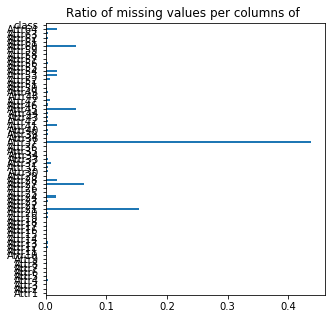

In [18]:
def check_missing_values(train_files):
       
        plt.figure(figsize=(5, 5))
        train_files.isnull().mean(axis=0).plot.barh()
        plt.title("Ratio of missing values per columns of ")
        
        train_missing=train_files.isnull().sum().sum()
        print('Missing values in train data : ',train_missing)
        
check_missing_values(train_files_2)

The above step shows us that there are a lot of rows in each of the dataframes which have missing data in at least one of the features. In most of these dataframes, the missing-data-rows correspond to more than 40% of the entire data.   

#### 3.A.a Generate Sparsity Matrix for the missing data
Now that we have established that there is a lot of missing data, let us find out if the missing data has some correlation.   
The `matrix` function from the `missingno` library helps us generate sparsity matrix, which shows us the gaps in the data.

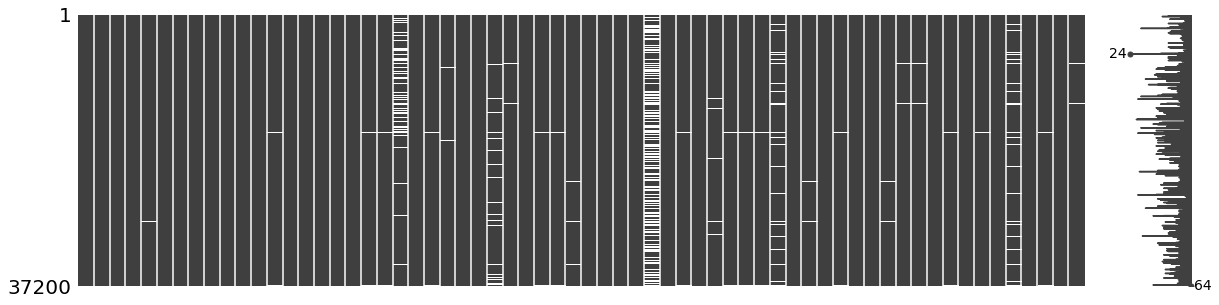

In [19]:
# generate the sparsity matrix (figure) for all the dataframes
def generate_sparsity_matrix(dfs):
    
        missing_df_i = dfs.columns[dfs.isnull().any()].tolist()
        msno.matrix(dfs[missing_df_i], figsize=(20,5))

generate_sparsity_matrix(train_files_2)

- From the above plots of sparsity for all the 5 dataframes, we could notice a lot of sparsity for the feature `Attr37` has the highest sparsity among all the features for all the dataframes. The feature `Attr21` is sparse for some, if not all, dataframes. Also, more or less, all the features have missing data samples.   

- From the above sparsity-plot, we could only know how sparse the data is, yet we don't know if the data missing-ness is correlated among any features, i.e., is the data missing completely at random? Or are there any features that are missing together? as a next step, let us find out if there is some correlation among the features.

- However, by now it is clear that simply dropping all the rows with missing values, or eliminating all the features which have missing values is not a good approach of dealing with the missing data, as it leads to tremendous data loss.

#### 3.A.b Generate Heat Map for the missing data   
Now, let us find out if there is some correlation among the missing features.    

Using the `heatmap` function from `missingno` library, let us plot the heatmaps for all the dataframes.

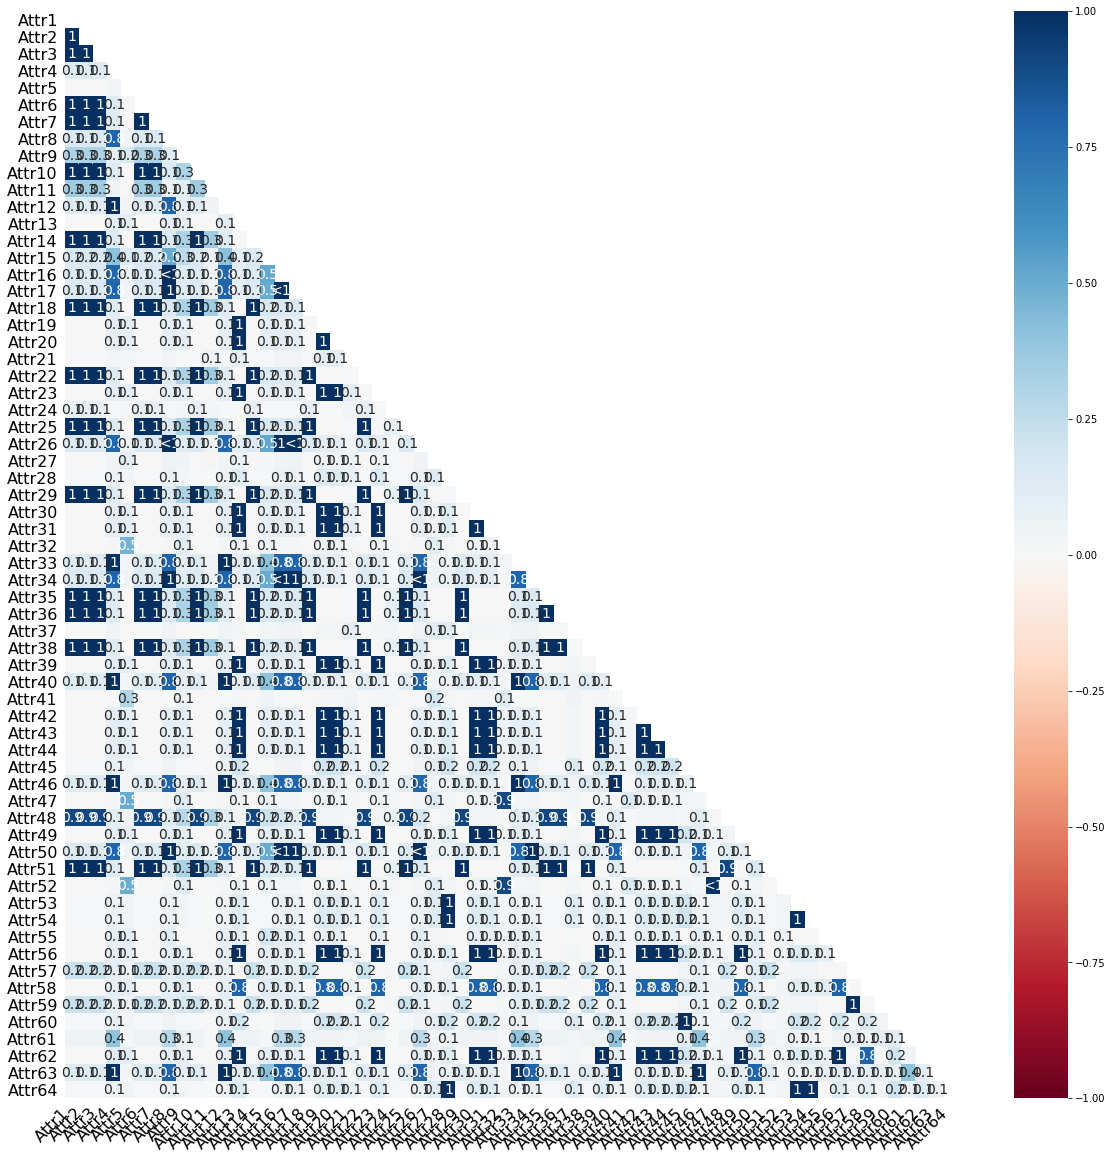

In [20]:
# generate the heatmap for all the dataframes
def generate_heatmap(dfs):
    
        missing_df_i = dfs.columns[dfs.isnull().any()].tolist()
        msno.heatmap(dfs[missing_df_i], figsize=(20,20))
        
generate_heatmap(train_files_2)        

The heat maps above, for all the 5 dataframes, describe the degree of nullity relationship between different features.    The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1).    
Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed.    

A perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values.       

A perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.   

The takeaway is that, in each dataframe, there are some features that are heavily correlated (R = 1 or -1) and also there are features that are not essentially correlated (R values close to 0)

> We have visually seen the sparsity in the data, as well as correlation among the features with respect to missing values. Now, let us see how much of data is actually missing.

## 3.B Data Imputation

It is now established that we need to impute (fill in the gaps) the missing data, as dropping the missing rows or eliminating the missing features is not an option.   

We would like to explore some of the widely used missing data imputation techniques.   
<b>
1. Mean Imputation (baseline method)
2. k Nearest Neighbors (k-NN) Imputation

### Dealing with Missing Data
Missing data causes 3 problems: 
1. Missing data can introduce a substantial amount of bias. 
2. Makes the handling and analysis of the data more difficult. 
3. Create reductions in efficiency. 

> Dropping all the rows with missing values or Listwise deletion, introduces bias and affects representativeness of the results. The only viable alternative to Listwise deletion of missing data is Imputation. Imputation is the process of replacing missing data with substituted values and it preserves all the cases by replacing missing data with an estimated value, based on other available information. <br>
In my project we explored 2 techniques of imputation, and we will see them in the subsequent sections. 
1. Mean Imputation 
2. k-Nearest Neighbors Imputation 

### 3.B. (a) Mean Imputation

> - Mean imputation technique is the process of replacing any missing value in the data with the mean of that variable in context. 
- In my dataset, I replaced a missing value of a feature, with the mean of the other non-missing values of that feature. Mean imputation attenuates any correlations involving the variable(s) that are imputed. 
- This is because, in cases with imputation, there is guaranteed to be no relationship between the imputed variable and any other measured variables. Thus, mean imputation has some attractive properties for univariate analysis but becomes problematic for multivariate analysis.
- Hence I opted Mean Imputation as a baseline method. I achieved mean imputation using scikit-learn’s Imputer class. 
 

In [21]:
train_files2 = train_files_2.copy()

In [22]:
def perform_mean_imputation(dfs):
   
    cols = dfs.columns
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    dfs = pd.DataFrame(imputer.fit_transform(dfs))
    dfs.columns = cols
    
    return dfs

mean_imputed_dataframes = perform_mean_imputation(train_files2)

In [23]:
mean_imputed_dataframes.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


Missing values in train data :  0


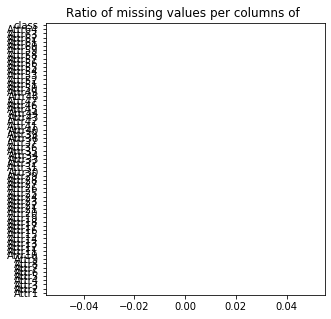

In [24]:
check_missing_values(mean_imputed_dataframes)

### 3.B. (b) KNN Imputation

> - The k-nearest neighbors algorithm or k-NN, is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. 
- It can also be used as a data imputation technique k-NN imputation replaces NaNs in Data with the corresponding value from the nearest-neighbor row or column depending upon the requirement. 
- The nearest-neighbor row or column is the closest row or column by Euclidean distance. If the corresponding value from the nearest-neighbor is also NaN, the next nearest neighbor is used. We used the fancyimpute library to perform k-NN data imputation, and we used 100 nearest neighbors for the process. 

In [25]:
train_files2 = train_files_2.copy()

In [26]:
# check_duplicate(train_files2)

In [27]:
# def perform_knn_imputation(dfs):
    
#     cols = dfs.columns

#     # Construct an knn_imputer with k = 100 to fancyimpute along the columns        
#     knn_imputer = fancyimpute.KNN(k=100,verbose=True)
#     dfs = pd.DataFrame(knn_imputer.fit_transform(dfs))
#     dfs.columns = cols
    
#     return dfs
    
# knn_imputed_dataframes = perform_knn_imputation(train_files2)

In [28]:
# knn_imputed_dataframes.head()

In [29]:
# check_missing_values(knn_imputed_dataframes)

In the above 2 steps, we have successfully created 2 differently imputed dataframes using: Mean, k-NN techniques respectively.   

Here below, we create a dictionary of all the imputed dataframes to re-use them in the future. 

In [30]:
# imputed_dataframes_dictionary = OrderedDict()
# imputed_dataframes_dictionary['Mean'] = mean_imputed_dataframes
# imputed_dataframes_dictionary['k-NN'] = knn_imputed_dataframes

### I am going to use mean imputation as it gives better accuracy than KNN
mean = 97.45%<br>
knn = 95.67%

In [31]:
imputed_df = mean_imputed_dataframes.copy()

In [32]:
imputed_df.shape

(37200, 65)

## 3.C Checking Duplicates values and drop it.

In [33]:
def check_duplicate(train_files):
    
        print('\nDataset: ')
        print('Dupplicate entries: {}'.format(train_files.duplicated().sum()))
#         print(train_files[k][train_files[k].loc[:,'Attr1':'Attr64'].duplicated()])
        
#       If duplicate entries drop the duplicates values
        train_files.drop_duplicates(inplace = True) 
        print('Dupplicate after applying: {}'.format(train_files.duplicated().sum()))
check_duplicate(imputed_df)


Dataset: 
Dupplicate entries: 340
Dupplicate after applying: 0


### There are 340 duplicacy in the dataset which we are going to drop it.

In [34]:
imputed_df.shape

(36860, 65)

### Checking any duplicay left

In [35]:
check_duplicate(imputed_df)


Dataset: 
Dupplicate entries: 0
Dupplicate after applying: 0


##### No duplicacy is left

## 3.D Dealing with imbalanced data   

In the steps seen above, we have successfully dealt with the missing data. But we have not dealt with the class imbalance (if any) in the data. Simply put, Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes.   

Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.   

Firstly, let us see if our data is imbalanced, and to what extent.

### Is the Dataset balanced?

### How many 0 and 1 items there are?

**Target Class Count**

In [36]:
def check_data_imbalance(dfs):
    
        print(dfs.groupby('class').size())
        minority_percent = (dfs['class'].tolist().count(1) / len(dfs['class'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(imputed_df)

class
0.0    35227
1.0     1633
dtype: int64
Minority (label 1) percentage: 4.430276722734671%
----------------------------------------------------------------


We have seen in the step above that there is a lot of data imbalance for our datasets, as indicated by the percentage of minority class (label `1`) samples among their datasets. With this huge magnitude of data imbalance, the models will not train wel if we leave them as is. 

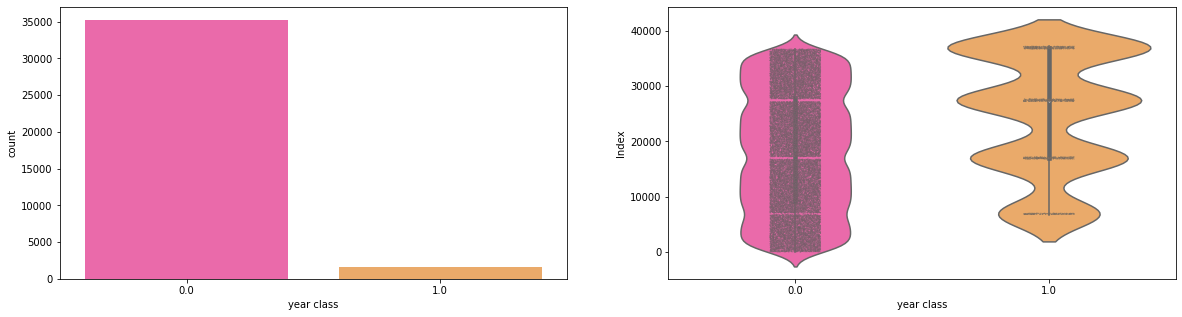

In [37]:
def bargraph_class_count(train_files):
    
        #Count plot & violin plot for target class
        
        fig,ax=plt.subplots(1,2,figsize=(20,5))
        sns.countplot(train_files['class'].values,ax=ax[0],palette='spring')
        sns.violinplot(x=train_files['class'].values,y=train_files.index.values,ax=ax[1],palette='spring')
        sns.stripplot(x=train_files['class'].values,y=train_files.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
        ax[0].set_xlabel('year class' )
        ax[1].set_xlabel('year class')
        ax[1].set_ylabel('Index')

bargraph_class_count(imputed_df)

**Observation**:

  - We are having a unbalanced data, where 90% of the data on every year is not Bankrupt & 10 % of  
      the data are those who are Bankrupt.
  - From the violin plots, it seems that there is no relationship between the target and index of the data frame, it is 
      more dominated by zero compare to one's.
  - From the jitter plots with violin plots, we can observe that target class looks uniformly distributed over the indexes of   
      the data frame.

### Issue 1: classes being imbalanced
### Issue 2: different importance of each type of missclassification
* solution 1: change performance metric -> recall score
* solution 2: use decision tree because it performs well under imbalanced data
* solution 3: generate synthetic samples to oversample minority class or undersample majority class
  
- We can see from the above histogram that our data is imbalanced for 0 and 1. To avoid this problem, we proposed 3 solutions. Since it is worse to misclassify a company that does go bankrupt, and 1 - recall score (TP/FN) measures it, so 
- We want recall score as large as possible. Therefore, we use recall score as scoring method.  
- Therefore, we try gradient boosting model, extreme gradient boosting and many more, use recall score to compare models, and oversample minority class.

### Dealing with Data Imbalance
> - I now explain how I am  dealing with the Data Imbalance. 
- Data Imbalance can be treated with Oversampling and/or Undersampling. 
- In data analysis, Oversampling and Undersampling are opposite and roughly equivalent techniques of dealing with Data Imbalance, where they adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). 
- Oversampling is increasing the class distribution of the minority class label whereas Undersampling is decreasing the class distribution of the majority class label. In our project, we explored Synthetic Minority Oversampling Technique or SMOTE. 

## Outliers

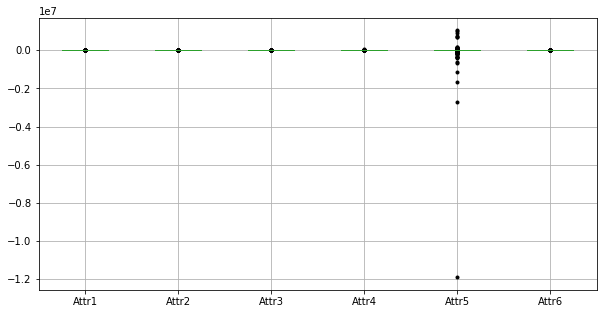

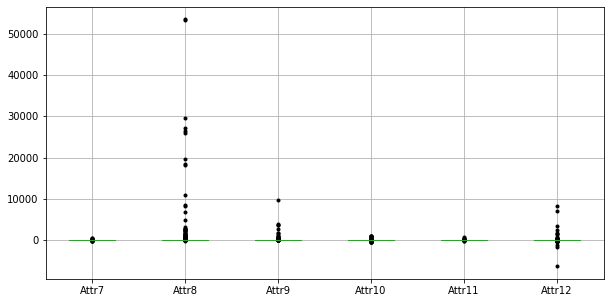

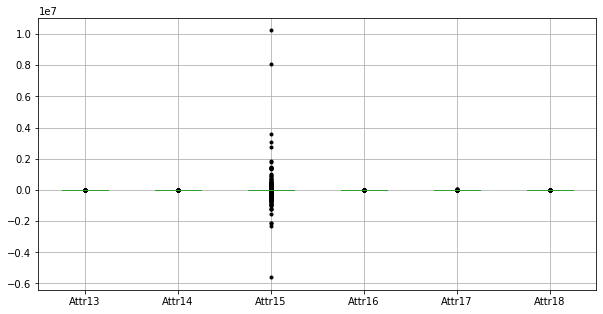

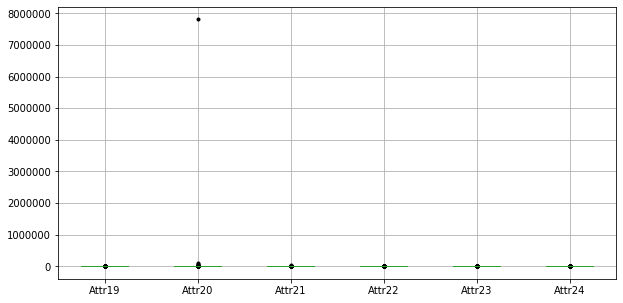

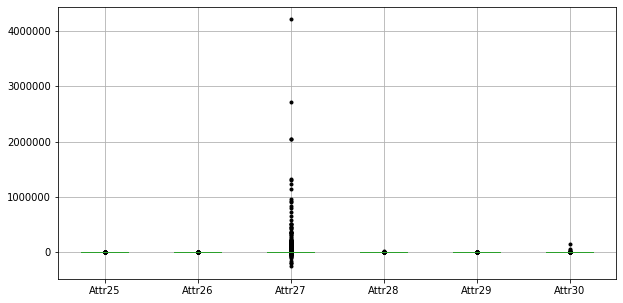

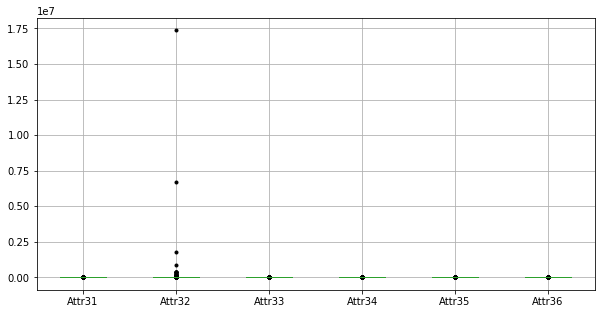

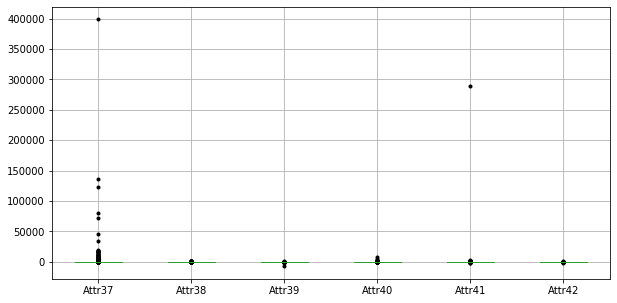

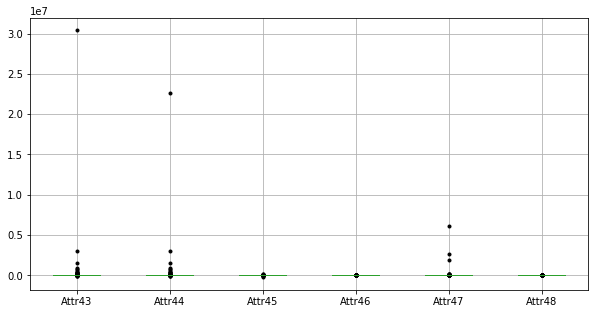

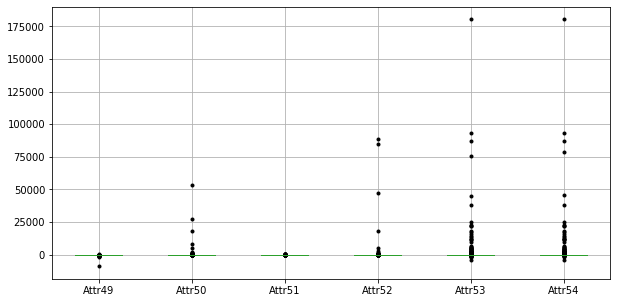

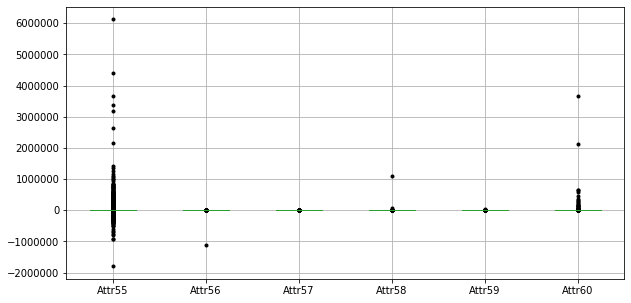

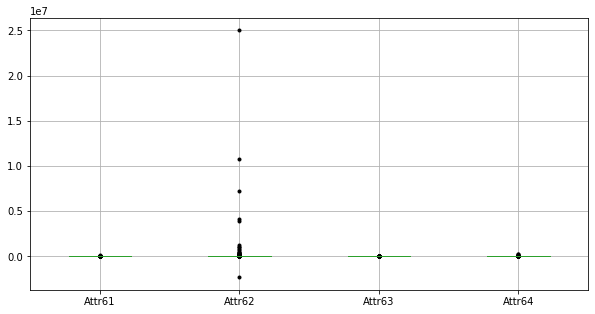

In [38]:
def boxplot(train_files):   
    # putting all the df colname in a list
    dfcols = list(train_files.columns)
    # exculdig target and index columns
    variables = dfcols[:-1]
    # splitting the list every n elements:
    n = 6
    chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

        # displaying a boxplot every n columns:

    for i in chunks:
        plt.show(train_files.boxplot(column = i, sym='k.', figsize=(10,5)))
            
boxplot(imputed_df)

**Observation**<br>
We can see from above boxplots that variables are mostly normally distributed but some variables have large standard deviations and ranges, such as Attr37, X62, for  dataset . We would like to eliminate outliers (companies) that have extreme values on these variables.

### Correlations

In [39]:
def check_correlation(train_files):    
    # choose a threshold to spot correlation above its abs()
    # try 0.08 or 0.05 to have some results, even though is not a relevant correlation 
    
   

        threshold = 0.3
        dfcorr = train_files.corr()
        dfcorr1 = train_files.copy()
        dfcorr1[abs(dfcorr1) < threshold] = None
        dfcorr1[abs(dfcorr1) >= threshold] = 1

        # all the variables have at least corr = 1 with itself so we want to know # which variables have more than 1 record above the threshold 
        cor = dfcorr1.sum(axis=1) > 1

        # Listing the variables that is worth investigating on
        var_to_check = list(cor[cor.values == True].index)


        if len(var_to_check) > 0:
            print('These are the variables with correlations >= {}:'.format(threshold))
        else:
            print('There are no significant correlations to look!')

        print(dfcorr[(dfcorr!=1) & (abs(dfcorr)>0.1)].count())

check_correlation(imputed_df)

These are the variables with correlations >= 0.3:
Attr1     15
Attr2      8
Attr3      7
Attr4      8
Attr5      0
          ..
Attr61     3
Attr62    13
Attr63    17
Attr64    19
class      0
Length: 65, dtype: int64


**Observation**<br>
Mostly All the correlations are > |0.3| ... They are extremely ***correlated***.<br>

#### Correlation between the attributes:

In [40]:
def corr_btwn_attr(train_files):
   

    #Correlation in train attiributes-
    train_attributes=train_files.columns.values[:-1]
    train_correlation=train_files[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
    train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
    print(train_correlation.head(10))
    print(train_correlation.tail(10))

corr_btwn_attr(imputed_df)

  level_0 level_1             0
0  Attr60  Attr51  1.173555e-07
1  Attr51  Attr60  1.173555e-07
2   Attr3  Attr53  3.685253e-07
3  Attr53   Attr3  3.685253e-07
4  Attr18  Attr62  5.764151e-07
5  Attr62  Attr18  5.764151e-07
6  Attr11  Attr41  5.799874e-07
7  Attr41  Attr11  5.799874e-07
8   Attr4  Attr43  1.017364e-06
9  Attr43   Attr4  1.017364e-06
     level_0 level_1         0
4022  Attr17   Attr8  0.999551
4023   Attr8  Attr17  0.999551
4024  Attr10  Attr38  0.999826
4025  Attr38  Attr10  0.999826
4026  Attr20  Attr56  0.999882
4027  Attr56  Attr20  0.999882
4028  Attr46   Attr4  0.999923
4029   Attr4  Attr46  0.999923
4030  Attr14   Attr7  1.000000
4031   Attr7  Attr14  1.000000


**Observation:** <br>
Its visible that correlation between train attributes is higly dependent.

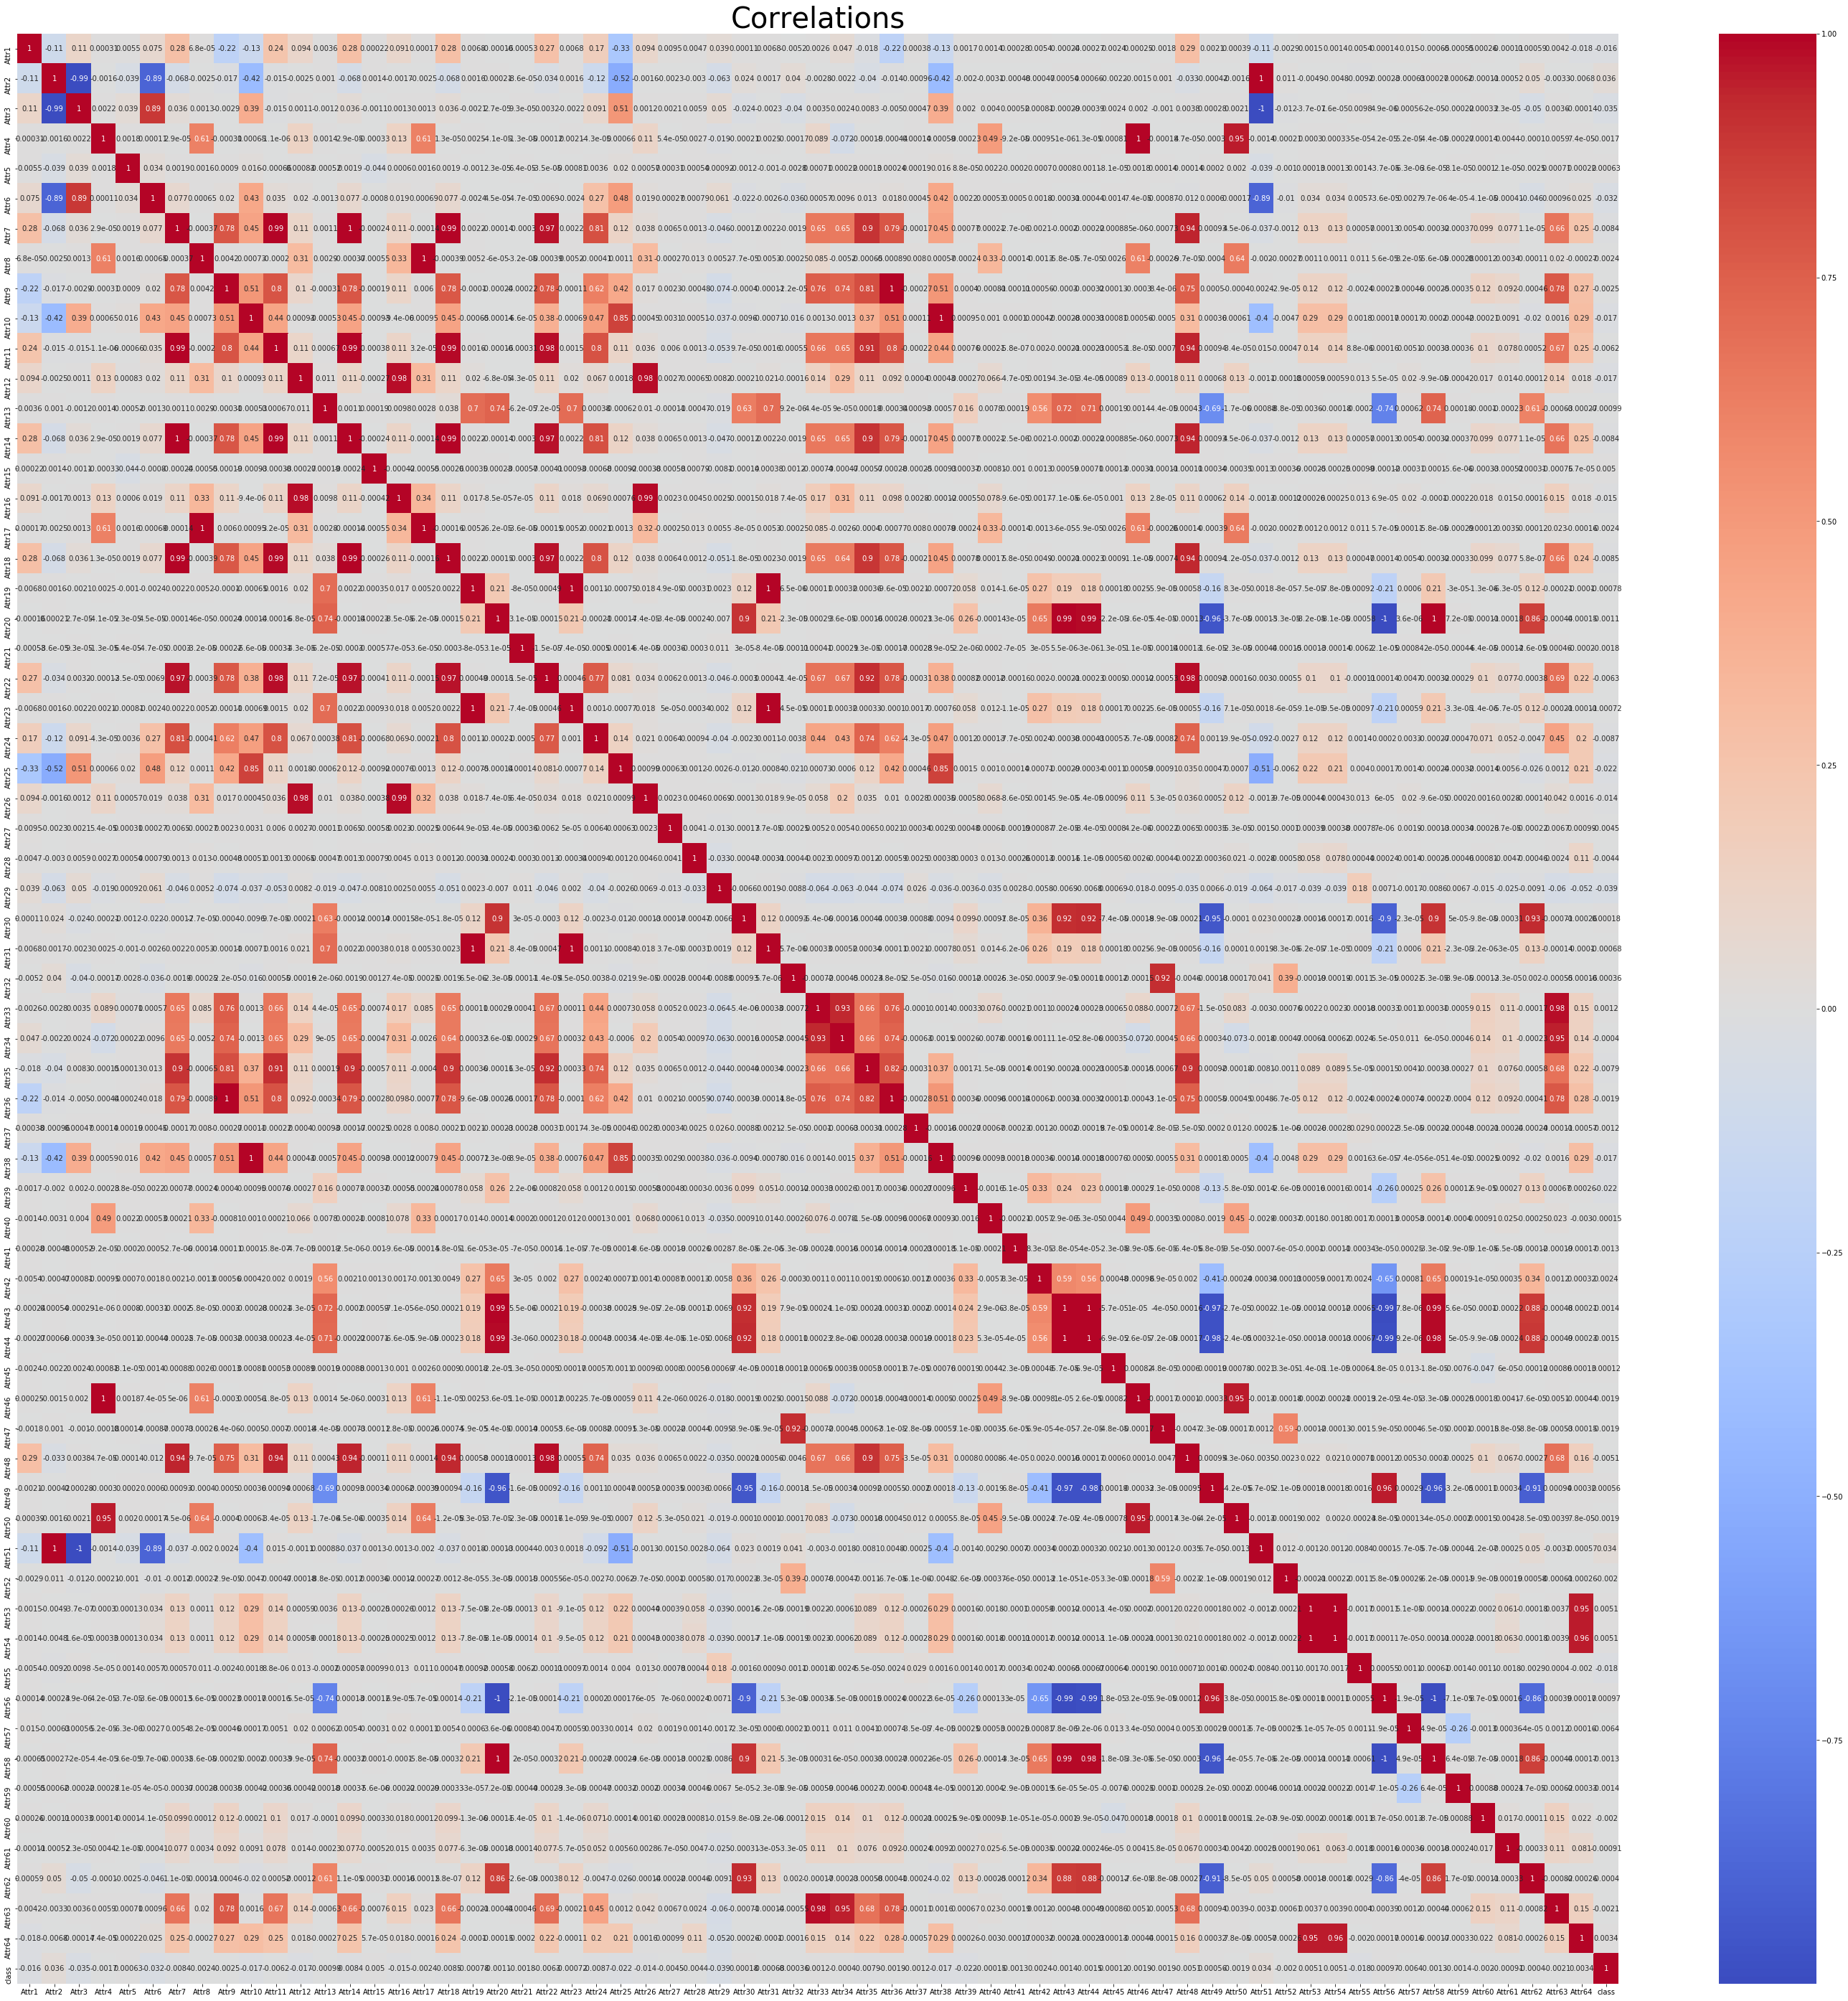

In [41]:
def generate_heatmap(dfs):
   
        plt.figure(figsize=(50,50))
        sns.heatmap(dfs.corr(),cmap='coolwarm',annot=True)
        plt.title('Correlations' , size = 40)

        
generate_heatmap(imputed_df) 

## Plotting density graphs

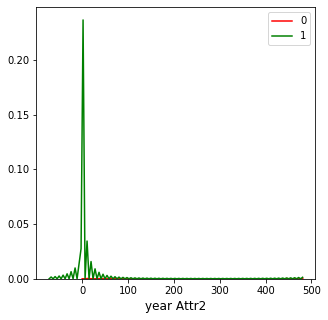

In [42]:
def density_graph(train_files):    
    
        fig = plt.figure(figsize=(5,5))
        sns.distplot(train_files[train_files['class']>0]['Attr2'], hist=False,label='0', color='red')
        sns.distplot(train_files[train_files['class']==0]['Attr2'], hist=False,label='1', color='green')
        plt.xlabel('year Attr2', fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=10)
        plt.tick_params(axis='y', which='major', labelsize=10)

density_graph(imputed_df)

# 4. Data Modeling: Building Classification Models


### Stratified KFold Cross Validator

In [43]:
def prepare_StratifiedKFold_cv_data(k, X, Y, verbose=False):    
    #Stratified KFold Cross Validator:-
    skf=StratifiedKFold(n_splits=k, random_state=42, shuffle=True)
    for train_index, valid_index in skf.split(X,Y): 
        X_train, X_test = X.iloc[train_index], X.iloc[valid_index] 
        y_train, y_test = Y.iloc[train_index], Y.iloc[valid_index]

    return X_train, y_train, X_test, y_test

## Scaling the data

### We scale the data because it helps to normalise the data within a particular range and every feature transforms to a common scale.

- Z-score of the input data, relative to the sample mean and standard deviation.
- It allows us to calculate the probability of a score occurring within our normal distribution and enables us to compare two scores that are from different normal distributions.
- A Z-score is the number of standard deviations from the mean a data point is.
- A Z-score is also known as a standard score and it can be placed on a normal distribution curve.
- The Z-score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. The - p-value is the probability that you have falsely rejected the null hypothesis.
- Z-scores are measures of standard deviation.

In [44]:
from scipy.stats import zscore
from scipy import stats

In [45]:
chek_outl = imputed_df.copy()

In [46]:
chek_outl.shape

(36860, 65)

From EDA, we want to **drop outliers** that are outside of 3 standard deviations first, then upsample minority (1) using synthetic samples.

In [47]:
# imputed_df=imputed_df.apply(zscore)
# imputed_df.shape

In [48]:
def drop_numerical_outliers(dfs, z_thresh=3):
    
    print('Before dropping outliers: ', dfs.shape)
    a = dfs.shape[0]

    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = dfs.iloc[:,:-1].select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    dfs.drop(dfs.index[~constrains], inplace=True)
    b = dfs.shape[0]
    print('After dropping outliers: ', dfs.shape)
    c = a-b
    print('c = ', c)

In [49]:
drop_numerical_outliers(imputed_df)

Before dropping outliers:  (36860, 65)
After dropping outliers:  (35885, 65)
c =  975


### Split dataframes features and labels

In [50]:
X_feature = imputed_df.drop(["class"],axis=1)
y_label = imputed_df["class"].astype(int)

In [51]:
X_feature.shape


(35885, 64)

In [52]:
y_label.shape

(35885,)

### Synthetic Minority Oversampling Technique (SMOTE):-
> - This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.
- Synthetic Minority Oversampling Technique (SMOTE) is a widely used oversampling technique. 
- To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. 
- For simplicity, assume the features are continuous. 
- As an example, let us consider a dataset of birds for clarity. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight. 
- To oversample, take a sample from the dataset, and consider its k nearest neighbors in the feature space. To create a synthetic data point, take the vector between one of those k neighbors, and the current data point.
- Multiply this vector by a random number x which lies between 0, and 1. Adding this to the current data point will create the new synthetic data point. SMOTE was implemented from the imbalancedlearn library.

In [53]:
"""
Need to split train test sets before upsampling
We only upsample train set
"""
def upsampling_minority(X, y):
    # Setting up testing and training sets using Stratified KFold Cross Validator
 
    skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    for train_index, valid_index in skf.split(X,y): 
        X_train, X_test = X.iloc[train_index], X.iloc[valid_index] 
        y_train, y_test = y.iloc[train_index], y.iloc[valid_index]
                
    
    print('Before upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Unbalanced training data{}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))
    
    sm = SMOTE(random_state=10)
    X_train, y_train = sm.fit_resample(X_train, y_train)
   
    print('Finished upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Balanced training data {}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))
    
    return X_train, X_test, y_train, y_test

### Training and Testing data

In [54]:
 X_train, X_test, y_train, y_test = upsampling_minority(X_feature, y_label)

Before upsampling: training data shape (28708, 64) test data shape (7177, 64)
Unbalanced training data{'Not Bankrupt': 27443, 'Bankrupt': 1265}
Finished upsampling: training data shape (54886, 64) test data shape (7177, 64)
Balanced training data {'Not Bankrupt': 27443, 'Bankrupt': 27443}


**Observation:-** We can observe that the smote model is performing well on imbalance data

# Data Modeling

>In this section, I will look at the various classification models that I have considered for training on the bankruptcy datasets to achieve the task of coming up with a predictive model that would predict the bankruptcy status of a given (unseen) company with an appreciable accuracy. <br>
I have considered the following models: <br>
1. Gaussian Naïve Bayes 
2. Logistic Regression 
3. Gradient Boosting Classifier
4. Random Forests 
5. Extreme Gradient Boosting 
6. Support Vector Machine
7. Neural Network

### Gaussian Naïve Bayes Classifier
 Naive Bayes classifier is one of the supervised learning algorithms which is based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Given a class variable 𝑦𝑦 and a dependent feature vector 𝑥𝑥1 through  𝑥𝑥𝑛𝑛, Bayes’ theorem states the following relationship:

ndence assumption that: 𝑃𝑃 (𝑥𝑥𝑖𝑖 |𝑦𝑦, 𝑥𝑥1, …, 𝑥𝑥𝑖𝑖−1, 𝑥𝑥𝑖𝑖+1, …𝑥𝑥𝑛𝑛)=𝑃𝑃(𝑥𝑥𝑖𝑖| 𝑦𝑦) for all 𝑖𝑖, this relationship is simplified to: 𝑃𝑃(𝑦𝑦 | 𝑥𝑥1, …, 𝑥𝑥𝑛𝑛)= 𝑃𝑃(𝑦𝑦)∏ 𝑃𝑃(𝑥𝑥𝑖𝑖∣𝑦𝑦) 𝑛𝑛 𝑖𝑖=1𝑃𝑃 (𝑥𝑥1, …, 𝑥𝑥𝑛𝑛) Since 𝑃𝑃(𝑥𝑥1, …, 𝑥𝑥𝑛𝑛) is constant given the input, we can use the following classification rule: 𝑃𝑃(𝑦𝑦 |𝑥𝑥1, …, 𝑥𝑥𝑛𝑛)∝ 𝑃𝑃(𝑦𝑦) �𝑃𝑃(𝑥𝑥𝑖𝑖 | 𝑦𝑦) 

## GridSearchCV
GridSearchCV lets you combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from the classifier, so yes, you can use the .score, .predict, etc.. methods directly through the GridSearchCV interface. If you wish to extract the best hyper-parameters identified by the grid search you can use .best_params_ and this will return the best hyper-parameter. You can then pass this hyper-parameter to your estimator separately.<br><br>

Using .predict directly will yield the same results as getting the best hyper-parameter through .best_param_ and then using it in your model. By understanding the underlining workings of grid search we can see why this is the case.

In [55]:
"""
Plot test score heatmap of parameter sets
"""
def plot_heatmap(grid, params):
    results = pd.DataFrame(grid.cv_results_)
    keys = list(params.keys())
    scores = np.array(results.mean_test_score).reshape(len(params[keys[1]]), 
                                                             len(params[keys[0]]))
    plt.figure()
    mglearn.tools.heatmap(scores, xlabel=keys[0], xticklabels=params[keys[0]], 
                          ylabel=keys[1], yticklabels=params[keys[1]], 
                          cmap="viridis", fmt='%0.5f')
    plt.show()

### Parameter Tunning for GBM
1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
2. Determine the optimum number of trees 'n_estimators' for this learning rate.
3. Tune tree-specific parameters for decided learning rate and number of trees:
    1. min_samples_split: This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
    2. min_samples_leaf: Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
    3. max_depth: based on the number of observations and predictors.
    4. max_features
    5. subsample: proportion of samples used in tunning a tree
4. Lower the learning rate and increase the estimators proportionally to get more robust models.

In [56]:
"""
Grid search for gradient boosting model
"""
def gbm_grid_search(original_gbm, X_train, y_train, score_method, show_plots, predictors):
    
    # tune n_estimators, max_depth
    param_trees = {'n_estimators': [i for i in range(10, 101, 30)],
                  'max_depth': [i for i in range(2,6,1)]}
    gsearch1 = GridSearchCV(estimator = original_gbm, 
                            param_grid = param_trees, 
                            scoring=score_method,
                            n_jobs=-1,
                            iid=False,
                            cv=5
                           )
    gsearch1.fit(X_train, y_train)
    if show_plots:
        print('Best parameters: ', gsearch1.best_params_)
        plot_heatmap(gsearch1, param_trees)
    
    # tune min_samples_split, min_samples_leaf
    param_tree2 = {'min_samples_split': [i for i in range(10,51,20)],
                  'min_samples_leaf': [i for i in range(10,51,20)]}
    gsearch2 = GridSearchCV(estimator = gsearch1.best_estimator_, 
                            param_grid = param_tree2, 
                            scoring=score_method,
                            n_jobs=-1,
                            iid=False, 
                            cv=5)
    gsearch2.fit(X_train, y_train)
    if show_plots:
        print('Best parameters: ', gsearch2.best_params_)
        plot_heatmap(gsearch2, param_tree2)
    
    # tune learning_rate
    n_estimator = gsearch1.best_params_['n_estimators']
    param_tree3 = [{'learning_rate': [0.1],
                  'n_estimators': [n_estimator]},
                  {'learning_rate': [0.1*5],
                  'n_estimators': [n_estimator//5]},
                  {'learning_rate': [0.1/10],
                  'n_estimators': [n_estimator*10]}]
    gsearch3 = GridSearchCV(estimator = gsearch2.best_estimator_, 
                            param_grid = param_tree3, 
                            scoring=score_method,
                            n_jobs=-1,
                            iid=False, 
                            cv=5)
    gsearch3.fit(X_train, y_train)
    print('Best score: ', gsearch3.best_score_)                 
    
    # best estimator
    gbm1 = gsearch3.best_estimator_
    
    # plot result tree and feature importance
    if show_plots:
        print('Best parameters: ', gsearch3.best_params_)
        print('Show Tree:\n')
        export_graphviz(gbm1.estimators_[0][0])
        
#         with open("tree.dot") as f:
#             dot_graph = f.read()
#         display(graphviz.Source(dot_graph))
        
        print('Show Feature Importance:\n')
        feat_imp = pd.Series(data=gbm1.feature_importances_, index=predictors).sort_values(ascending=False)
        plt.figure()
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
    
    return gbm1

### Parameter Tunning for Neural Network
input: (feature,) = (64,)  
output: one number 0/1

#### Speed up techniques
1. Normalize input (X)  
2. Initialize weight, uses activation 'relu'  
3. Using mini-batch gradient descent: 32, 64, 128...  
4. Using 'adam' optimizer  

#### Hyperparameters
* batch size: 64, 128    
* hidden units/layers: 3 layers, [64, 16, 1] (default) seems reasonable with a starting 41 features, [32, 16, 1] for comparison    
* epoch: 5, 10
* loss: binary crossentropy, to classify bankrupt / not bankrupt
* polynomial features: degree 1, 2

#### Process
1. feature engineering: try polynomial features of degree 1 or 2
2. normalize features
3. train model using grid search cross validation
  

In [57]:
def nn_3layers(n_hiddens=[64,16], input_size=64):
    nn_model = Sequential([ layers.Dense(n_hiddens[0], activation=tf.nn.relu, name="hidden1", input_shape=(input_size,)),
                               layers.Dense(n_hiddens[1], activation=tf.nn.relu, name='hidden2'),
                               layers.Dense(1, activation=tf.nn.sigmoid, name="outputs")
                             ]
                            )
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return nn_model

In [58]:
def nn_grid_search(X_train, y_train, score_method, nn_layers=nn_3layers):
    nn_model = KerasClassifier(build_fn=nn_layers)
    pipe_nn = make_pipeline(PolynomialFeatures(include_bias=False), StandardScaler(), nn_model)
    param_nn = [{'polynomialfeatures__degree': [1],
                'kerasclassifier__input_size': [len(PolynomialFeatures(1, include_bias=False).fit(X_train).get_feature_names())],
                'kerasclassifier__n_hiddens': [(64, 16), (32, 16)],
                'kerasclassifier__epochs': [5,10],
                'kerasclassifier__batch_size': [64, 128]
               },
                {'polynomialfeatures__degree': [2],
                'kerasclassifier__input_size': [len(PolynomialFeatures(2, include_bias=False).fit(X_train).get_feature_names())],
                'kerasclassifier__n_hiddens': [(64, 16), (32, 16)],
                'kerasclassifier__epochs': [5,10],
                'kerasclassifier__batch_size': [64, 128]
               }]
    nsearch = GridSearchCV(estimator=pipe_nn, 
                        param_grid=param_nn,
                        scoring=score_method,
                        n_jobs=-1, 
                        iid=False,
                        cv=3)

    nsearch.fit(X_train, y_train)
    print('Best parameters: ', nsearch.best_params_)
    
    return nsearch.best_estimator_

## Main Function
It incorporates data processing, sampling, and model training and outputs all trained models:
* Naive Bayes
* Logistic Regression
* Support Vector Machine
* Gradient Boosting Tree
* Extreme Gradient Boosting Classifier
* Neural Network

### XGBoost
XGBoost improves the gradient boosting method even further.
> **XGBoost** (*extreme gradient boosting*) regularises data better than normal gradient boosted Trees.

It was developed by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ($j$ trees). In the formula $f_j$ means a prediction coming from the $j^th$ tree.

$$
obj(\theta) = \sum_{i}^{n} l(y_i - \hat{y_i}) +  \sum_{j=1}^{j} \Omega (f_j)
$$

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

First part ($\gamma T$) is responsible for controlling the overall number of created leaves, and the second term ($\frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2$) watches over the scores.


**Mathematics Involved**
Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the *number of residuals* and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:
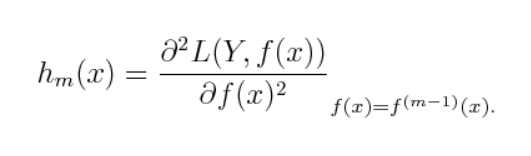


where **L** is the loss function. 

- Initialise the tree with only one leaf.
- compute the similarity using the formula
$$
Similarity= \frac {Gradient^2}{ hessian +\lambda}
$$
Where $\lambda $ is the regularisation term.
- Now for splitting data into a tree form, calculate
$$
Gain=  left similarity+right similarity-similarity for root
$$ 
- For tree pruning, the parameter $ \gamma$ is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of $\gamma$.


 If $Gain- \gamma < 0$, remove that branch. Else, keep the branch 
 
- Learning is done using the equation
$$
New Value= old Value+ \eta * prediction
$$

where $\eta$ is the learning rate


In [59]:
 # eXtreme Gradient Boosting Classifier (XGBClassifier)

def xgb_boosting(X_train, y_train):
    print('\nStart training eXtreme Gradient Boosting Classifier')
    xgb_classifier = XGBClassifier()
    #     xgb_classifier.fit(X_train, y_train)

    param_grid = {
        'learning_rate': [0.1, 0.01, 0.5],
        'max_depth':[5,7,10],
        'n_estimators': [200, 300, 400],
        'objective': ['binary:logistic', 'binary:logitraw']
    }


    grid = GridSearchCV(xgb_classifier ,param_grid = param_grid, verbose=3)
    grid.fit(X_train, y_train)

    best_parameter = grid.best_params_
    
    return best_parameter
    

In [60]:
xgb_param = xgb_boosting(X_train, y_train)
xgb_param


Start training eXtreme Gradient Boosting Classifier
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.959, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.979, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.986, total=  12.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.986, total=  12.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.983, total=  12.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logitraw, score=0.948, total=  12.6s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logitraw, score=0.983, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=5, n_

[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.971, total=  26.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.994, total=  26.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.996, total=  26.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.996, total=  26.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.996, total=  26.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.1, max_depth=7, n_

[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, objective=binary:logitraw, score=0.996, total=  44.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400, objective=binary:logitraw 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, objective=binary:logitraw, score=0.996, total=  45.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.884, total=  13.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.878, total=  13.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic, score=0.906, total=  13.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200, objective=binary:logistic 
[CV]  learning_rate=0.01, max_

[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic, score=0.935, total=  28.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic, score=0.953, total=  27.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic, score=0.956, total=  28.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logistic, score=0.946, total=  29.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logitraw, score=0.908, total=  29.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300, objective=binary:logitraw 
[CV]  learning_rate=0.01, max_

[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.978, total=  55.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.971, total=  53.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw 
[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw, score=0.949, total=  54.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw 
[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw, score=0.966, total=  53.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw 
[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw, score=0.978, total=  53.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400, objective=binary:logitraw 
[CV]  learning_rate=

[CV]  learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw, score=0.993, total=  16.5s
[CV] learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw, score=0.996, total=  16.0s
[CV] learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw, score=0.996, total=  15.9s
[CV] learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw 
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200, objective=binary:logitraw, score=0.997, total=  15.9s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300, objective=binary:logistic, score=0.976, total=  21.7s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=7, n_

[CV]  learning_rate=0.5, max_depth=10, n_estimators=300, objective=binary:logitraw, score=0.996, total=  24.4s
[CV] learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.979, total=  27.0s
[CV] learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.991, total=  29.4s
[CV] learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.995, total=  29.5s
[CV] learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic, score=0.996, total=  29.4s
[CV] learning_rate=0.5, max_depth=10, n_estimators=400, objective=binary:logistic 
[CV]  learning_rate=0.5, max_d

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 117.2min finished


{'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 400,
 'objective': 'binary:logistic'}

In [61]:
joblib.dump(xgb_param, "xgb_param_knn.pkl")
print('saved xgb_knn')

saved xgb_knn


In [62]:
# Load the pipeline first:
# xgb_param_knn = joblib.load('xgb_param_knn.pkl')

**For XGBoost I have choosen very less parameter tuning. because my computational laptop power is very less, having 4 gb ram. It had been taken lots of time to get the best params around more than 2 days.. Even though I have learn so many things while doing this projects and keeping in my mind from previous project review that to work on parameter tuning and more algorithm and method to execute. I tried to explain the things as per my best.**

### Support Vector Machine

- **Support Vector Machine** (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.<br> 
- However,  it is mostly used in classification problems. 
- In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
- Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).

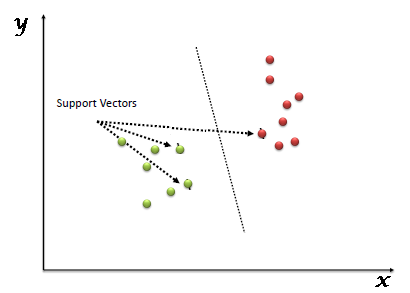

Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).

In [66]:
def MyModel(X_train, y_train, show_plots=True, score_method='recall'):
    
    """
    Naive Bayes
    """
    print('start training Naive Bayes...')
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    print('Finished training Naive Bayes...')
    print("="*80)
    
    """
    Logistic Regression
    """
    
    print('\nStart training Logistic Regression...')
    params_logit = {'polynomialfeatures__degree': [1, 2],
               'selectpercentile__percentile': [50, 100],
               'logisticregression__C': [0.01, 1, 100]}
    pipe_logit = make_pipeline(PolynomialFeatures(include_bias=False), 
                               StandardScaler(), SelectPercentile(), 
                               LogisticRegression(max_iter=1000))
    lsearch = GridSearchCV(estimator=pipe_logit, 
                           scoring='recall', 
                           param_grid=params_logit, 
                           cv=5, 
                           iid=False, 
                           n_jobs=-1)
    lsearch.fit(X_train, y_train)
    lr = lsearch.best_estimator_
    print('Finished training Logistic Regression...')
    print("="*80)
    
    """
    Support Vector Machine
    """
    print('\nStart training Support Vector Machine...')
    params_svc = [{'svc__kernel' : ['rbf'],
             'svc__gamma' : [0.01, 0.1, 1, 10, 100],
             'svc__C' : [0.01, 0.1, 1, 10, 100]},
             {'svc__kernel' : ['linear'],
             'svc__C' : [0.01, 0.1, 1, 10, 100]}]
    pipe_svc = make_pipeline(MinMaxScaler(), SVC()) # no need for polynomialfeatures
    ssearch = GridSearchCV(estimator=pipe_svc, 
                           scoring='recall', 
                           param_grid=params_svc, 
                           cv=5, 
                           iid=False, 
                           n_jobs=-1)
    ssearch.fit(X_train, y_train)
    svc = ssearch.best_estimator_
    print('Finished training Support Vector Machine...')
    print("="*80)
    
    """
    GBM
    """
    print('\nStart training Gradient Boosting...')
    gbm0 = GradientBoostingClassifier(random_state=10)
    gbm0.fit(X_train, y_train)
    gbm1 = gbm_grid_search(gbm0, X_train, y_train, 
                           score_method=score_method, show_plots=show_plots, predictors = X_train.columns)
    print('Finished training Gradient Boosting...')
    print("="*80)
    
    """
    NN
    """
    print('/nStart training Neural Network...')
    nn = nn_grid_search(X_train, y_train, score_method='recall')
    print('Finished training Neural Network...')
    print("="*80)
    
   
    """
    xgb
    """
    print('\nStart training eXtreme Gradient Boosting Classifier')
    xgb = XGBClassifier(learning_rate= 0.5,
                                 max_depth = 5,
                                 n_estimators = 400,
                                 objective = 'binary:logistic')
    xgb = xgb.fit(X_train, y_train)
    
    print('Finished training eXtreme Gradient Boosting Classifier')
    print("="*80)
    
    
    # all models
    models = [clf, lr, svc, gbm1, xgb, nn]
    
    return models

start training Naive Bayes...
Finished training Naive Bayes...

Start training Logistic Regression...
Finished training Logistic Regression...

Start training Support Vector Machine...
Finished training Support Vector Machine...

Start training Gradient Boosting...
Best parameters:  {'max_depth': 5, 'n_estimators': 100}


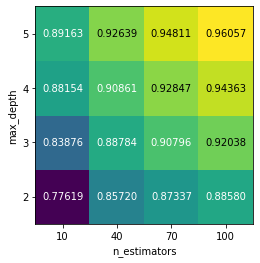

Best parameters:  {'min_samples_leaf': 10, 'min_samples_split': 10}


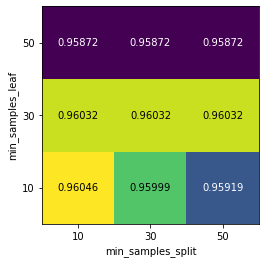

Best score:  0.9604645150359026
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Show Tree:

Show Feature Importance:



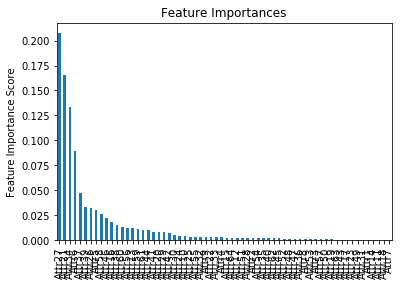

Finished training Gradient Boosting...
/nStart training Neural Network...
Train on 54886 samples
Epoch 1/10
54886/54886 [==============================] - 3s 60us/sample - loss: 0.2885 - acc: 0.8860
Epoch 2/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.1419 - acc: 0.9483
Epoch 3/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.1057 - acc: 0.9614
Epoch 4/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0893 - acc: 0.9687
Epoch 5/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0771 - acc: 0.9737
Epoch 6/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0610 - acc: 0.9787
Epoch 7/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0573 - acc: 0.9799
Epoch 8/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0464 - acc: 0.9837
Epoch 9/10
54886/54886 [==============================] - 2s 29us/sample - loss: 0.0474

In [68]:
mymodels = MyModel(X_train, y_train)

In [69]:
model = mymodels[:-1]
model

[GaussianNB(priors=None, var_smoothing=1e-09),
 Pipeline(memory=None,
          steps=[('polynomialfeatures',
                  PolynomialFeatures(degree=2, include_bias=False,
                                     interaction_only=False, order='C')),
                 ('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('selectpercentile',
                  SelectPercentile(percentile=100,
                                   score_func=<function f_classif at 0x0000024602D7FE58>)),
                 ('logisticregression',
                  LogisticRegression(C=100, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', to

In [70]:
joblib.dump(model, "mymodels_meann2.pkl")
print('saved mymodels_meann2')

saved mymodels_meann2


# Performance Analysis
Compare performance of all models, metrics used:
* accuracy
* precision
* recall
* f1
* roc_auc

In [71]:
"""
Comparison of models
"""
def CompareModels(models, curve, show_plots=True, X_test=X_test, y_test=y_test):
    final_report = pd.DataFrame(index=['clf', 'lr', 'svc', 'gbm', 'xgb', 'nn'], 
                            columns=['accuracy', 'precision', 'recall', 'f1',  'f1_macro'])
    
    for i in range(len(models)):
        model = models[i]
        name = final_report.index[i]
        report = pd.DataFrame(classification_report(y_test, model.predict(X_test), output_dict=True)).transpose()
        final_report.loc[name, :] = [report.loc['accuracy', 'support'], 
                                 report.loc['1', 'precision'],
                                 report.loc['1', 'recall'],
                                 report.loc['1', 'f1-score'],
                                 report.loc['macro avg', 'f1-score']]
        
    print("Model Comparison Report:\n", final_report)
    
    
    def plot_curve(model, model_name, marker, decision_function, curve):
        if decision_function:
            precision, recall, thresholds = curve(y_test, model.decision_function(X_test))
            close = np.argmin(np.abs(thresholds))
        else:
            precision, recall, thresholds = curve(y_test, model.predict_proba(X_test)[:,1])
            close = np.argmin(np.abs(thresholds - 0.5))

        plt.plot(precision, recall, label=model_name)
        plt.plot(precision[close], recall[close], marker, c='k', markersize=10, 
                label="threshold "+model_name, fillstyle='none', mew=2)
        
    # roc_auc plot
    if show_plots:
        plt.figure()
        plt.title('Curve')
        plot_curve(models[1], 'lr', 'o', False, curve)
        plot_curve(models[2], 'svc', '^', True, curve)
        plot_curve(models[3], 'gbm', 'D', False, curve)
        plot_curve(models[4], 'xgb', '^', False, curve)
        plot_curve(models[5], 'nn', '*', False, curve)
        plt.legend()
        plt.show()
    

Model Comparison Report:
      accuracy  precision    recall        f1  f1_macro
clf  0.102132  0.0441899  0.936909  0.084399  0.101795
lr   0.965306   0.593923  0.678233  0.633284  0.807538
svc  0.936464   0.346578  0.495268  0.407792  0.687112
gbm   0.95388   0.481865  0.586751  0.529161  0.752457
xgb  0.978682   0.876147  0.602524  0.714019  0.851473
nn   0.963216   0.573003  0.656151  0.611765  0.796229


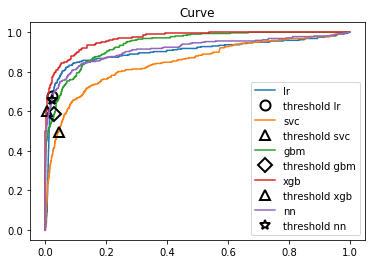

In [72]:
CompareModels(mymodels, roc_curve)

# Out of sample evaluation

*You*  should test your models out of sample.

This will be beneficial as *we* will evaluate your model out of sample using a holdout data directory.

It is up to you to decide on the out of sample data that you use for model development.



**The training data directory is highly imbalanced**
- You should expect the holdout data directory to be more balanced
- So you should strive to predict well on the minority class

## Testing model

In [73]:
input_test = pd.read_csv('5year.csv', low_memory=False)  # can also try for other years
best_model = mymodels[-2]

In [74]:
input_test.replace('?', np.nan, inplace = True)
input_test.iloc[:, :-1] = input_test.iloc[:, :-1].astype(np.float64)

In [75]:
input_test.shape

(5427, 65)

In [76]:
input_test.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.014572,0.271930,0.21070,1.7748,23.3820,-0.50571,0.035170,2.2603,1.01110,0.61463,...,0.010944,0.023708,0.98906,0.000000,28.2990,5.1871,48.827,7.4753,3.9289,0
1,0.118140,0.068266,0.63871,10.3560,230.8600,0.27958,0.146840,13.1190,1.14160,0.89559,...,0.124030,0.131910,0.87597,0.000000,13.9230,7.2895,26.994,13.5210,3.1501,0
2,0.183090,0.429960,0.14194,1.7529,36.4500,0.00000,0.227840,1.3258,1.35830,0.57004,...,0.474840,0.321190,0.52907,0.238660,18.6060,5.7166,50.660,7.2048,2.0287,0
3,0.046751,0.092770,0.54631,7.5793,181.9300,0.17516,0.046751,9.7793,0.97369,0.90723,...,0.173620,0.051532,0.84173,0.000000,7.6084,12.3520,31.127,11.7260,2.6269,0
4,0.035999,0.339750,0.15800,1.5586,-8.9378,0.15764,0.051682,1.7712,1.10070,0.60176,...,0.091497,0.059823,0.90850,0.094582,5.8399,4.0545,98.770,3.6955,1.8692,0


In [77]:
input_test.shape

(5427, 65)

Missing values in test data :  4254


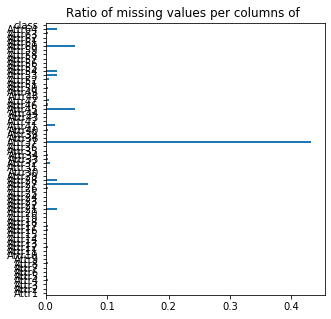

In [78]:
def check_missing_predict(train_files):
#     for i in range(len(train_files)):
#         k = str(i+1)+'year'
       
        plt.figure(figsize=(5, 5))
        train_files.isnull().mean(axis=0).plot.barh()
        plt.title("Ratio of missing values per columns of ")
        
        train_missing=train_files.isnull().sum().sum()
        print('Missing values in test data : ',train_missing)


check_missing_predict(input_test)

In [79]:
def peredict_mean_imputation(dfs):
   
    cols = dfs.columns

    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    dfs = pd.DataFrame(imputer.fit_transform(dfs))
    dfs.columns = cols
    
    return dfs

mean_imputed_predict = peredict_mean_imputation(input_test)

In [80]:
mean_imputed_predict

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.014572,0.271930,0.210700,1.77480,23.3820,-0.50571,0.035170,2.26030,1.01110,0.614630,...,0.010944,0.023708,0.98906,0.000000,28.2990,5.1871,48.827,7.4753,3.92890,0.0
1,0.118140,0.068266,0.638710,10.35600,230.8600,0.27958,0.146840,13.11900,1.14160,0.895590,...,0.124030,0.131910,0.87597,0.000000,13.9230,7.2895,26.994,13.5210,3.15010,0.0
2,0.183090,0.429960,0.141940,1.75290,36.4500,0.00000,0.227840,1.32580,1.35830,0.570040,...,0.474840,0.321190,0.52907,0.238660,18.6060,5.7166,50.660,7.2048,2.02870,0.0
3,0.046751,0.092770,0.546310,7.57930,181.9300,0.17516,0.046751,9.77930,0.97369,0.907230,...,0.173620,0.051532,0.84173,0.000000,7.6084,12.3520,31.127,11.7260,2.62690,0.0
4,0.035999,0.339750,0.158000,1.55860,-8.9378,0.15764,0.051682,1.77120,1.10070,0.601760,...,0.091497,0.059823,0.90850,0.094582,5.8399,4.0545,98.770,3.6955,1.86920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,0.012898,0.706210,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1.0
5423,-0.578050,0.967020,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1.0
5424,-0.179050,1.255300,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1.0
5425,-0.108860,0.743940,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1.0


Missing values in test data :  0


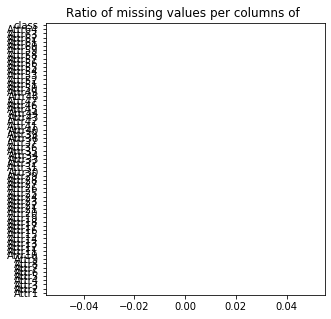

In [81]:
check_missing_predict(mean_imputed_predict)

In [82]:
def drop_numerical_outliers_predict(dfs, z_thresh=3):
    
    print('Before dropping outliers: ', dfs.shape)
    a = dfs.shape[0]

    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = dfs.iloc[:,:-1].select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    dfs.drop(dfs.index[~constrains], inplace=True)
    b = dfs.shape[0]
    print('After dropping outliers: ', dfs.shape)
    c = a-b
    print('c = ', c)

In [83]:
drop_numerical_outliers_predict(mean_imputed_predict)

Before dropping outliers:  (5427, 65)
After dropping outliers:  (5108, 65)
c =  319


In [84]:
input_test = mean_imputed_predict.copy()

In [85]:
input_y_test = input_test.loc[:, input_test.columns=='class']

In [86]:
input_y_test.shape

(5108, 1)

In [87]:
input_test = input_test.loc[:, input_test.columns!='class']

In [88]:
input_test.shape

(5108, 64)

In [89]:
best_predictions = best_model.predict(input_test)
best_predictions

array([0, 0, 0, ..., 1, 1, 1])

### XGB Prediction

In [138]:
mymodels[-3]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
xgb_predict = mymodels[-3].predict(input_test)
xgb_predict

array([0, 0, 0, ..., 1, 1, 1])

In [140]:
predictions_new = [round(value) for value in xgb_predict]
accuracy_new = accuracy_score(input_y_test,predictions_new)
accuracy_new

0.9524275646045419

## xgbb

In [114]:
xgb = XGBClassifier(learning_rate= 0.5,
                                 max_depth = 5,
                                 n_estimators = 400,
                                 objective = 'binary:logistic')
xgb = xgb.fit(X_train, y_train)

In [115]:
xgb_predict = xgb.predict(input_test)
xgb_predict

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
predictions_new = [round(value) for value in xgb_predict]
accuracy_new = accuracy_score(input_y_test,predictions_new)
accuracy_new

0.9765074393108849

## Randomforset

### Random Forests Classifier
> - A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. <br>
- In random forests, each tree in the ensemble is built from a sample drawn with replacement from the training set. 
- Also, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. 
- As a result of this randomness, the bias of the forest usually slightly increases but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model. 
- In my model,the number of estimators used are 10 and we have considered ‘Entropy’ as a measure of the quality of a split.

In [118]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
clf = RandomForestClassifier()

In [129]:
param_grid = {"n_estimators": [10, 50, 100, 130],
              "criterion": ['gini', 'entropy'],
              "max_depth": range(2, 4, 1),
              "max_features": ['auto', 'log2']}


grid = GridSearchCV(clf ,param_grid = param_grid, verbose=3)
grid.fit(X_train, y_train)

best_parameter = grid.best_params_


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.729, total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.697, total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.698, total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.740, total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.757, total=   0.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.753, total=   2.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.726, total=   2.5s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.728, total=   2.4s
[CV] criterion=gini, max_depth=2, max_features=auto, n_es

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.768, total=   7.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.761, total=   6.9s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.761, total=   7.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.754, total=   7.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.798, total=   9.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.762, total=   9.1s
[CV] criterion=gini, max_depth=3, max_features=auto

[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=0.711, total=   9.5s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.729, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.725, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.684, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.685, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.683, total=   0.6s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.743, total=   4.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.749, total=   4.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.736, total=   4.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.749, total=   4.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.790, total=   8.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.753, total=   8.0s
[CV] criterion=entropy, m

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 12.7min finished


In [130]:
best_parameter

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 130}

In [134]:
xgb = RandomForestClassifier(max_features= 'auto',
                                 max_depth = 5,
                                 n_estimators = 300,
                                 criterion = 'gini')
xgb = xgb.fit(X_train, y_train)

In [135]:
xgb_predict = xgb.predict(input_test)
xgb_predict

array([0, 0, 0, ..., 1, 1, 1])

In [136]:
predictions_new = [round(value) for value in y_pred]
accuracy_new = accuracy_score(input_y_test,predictions_new)
accuracy_new

0.9569303054032889

In [119]:
#Predicting the test set result  
y_pred= classifier.predict(input_test) 
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [120]:
predictions_new = [round(value) for value in y_pred]
accuracy_new = accuracy_score(input_y_test,predictions_new)
accuracy_new

0.9569303054032889

## nn_prediction

In [92]:
mymodels[-2]

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logitraw', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [93]:
# mymodels[-1].predict(input_test).reshape(1,-1)[0]

In [94]:
# print('GBM and NN produce', (best_predictions==nn_predictions).sum() / len(best_predictions), 'of same results')

# Conclusion

By comparing performance metrics, we can see that Xtreme Gradient Boosting model has the highest accuracy, precision, f1 scores, best roc_auc curve and a high recall rate of 0.60 (the metric we value the most), becoming the best model for predicting bankruptcy. Xtreme Gradient Boosting model and Neural Network perform secondly as well. It proves that trees work best with imbalanced data.  
  
From heatmap we can see that the model is improved using grid search on several parameters. According to feature importance, Attr27, Attr6, Attr24, Attr34 are the most important variables in explaining bankruptcy.  
  
For demonstration purpose, we only show training and prediction using 1st year, 2nd year, 3rd year and 4th year..5th year data to predict bankruptcy of companies in year 6.  But the results would be the same that XBM remain the best model overall.

# Suggestion

- Training, test, and holdout directories should all be similar
- It might be best for  you to write a single procedure that takes a directory name and prepares the data
    - If you use the same procedure for training, test, and holdout you are less likely to make mistakes.

# Submission

You will submit a *single* model for evaluation.

We will run this model on the holdout data directory (which we don't provide)
- the holdout data directory will be very similar to training but without targets
- your model should produce a prediction for each example in the holdout directory
- you can test your submission on the following dummy directory: 
    - `data/final_project/bankruptcy/sample`
    

In [95]:


modelName = "final_model_meann2"
model_path = os.path.join(modelName + ".sav") 
# model_path = "final_model_2.h5"

# model_directory = 'models/'
# filename = 'xgb'
# path = os.path.join(model_directory,filename)

def saveModel(pipeline, model_path):
#     Save the Keras model first:
#     pipeline.named_steps['kerasclassifier'].model.save(model_path)

#     # This hack allows us to save the sklearn pipeline:
#     pipeline.named_steps['kerasclassifier'].model = None
#     # Finally, save the pipeline:
    joblib.dump(pipeline, "pipeline_meann2.pkl")
    
    
def loadModel(model_path):
    # Load the pipeline first:
    pipeline = joblib.load('pipeline_meann2.pkl')

    # Then, load the Keras model:
#     model = load_model(model_path)
#     print(model.summary())
# #     pipeline.named_steps['kerasclassifier'].model = model
    
    return pipeline

def MyModel_predict(test_dir, model_path, year='5year'):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)  # pipeline with model
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    test_files = data_reading(test_dir)
    test = test_files[year]
    predictions = model.predict(input_test)
    
    return predictions

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = mymodels[-2] # CHANGE None to your model !

saveModel(my_model, model_path)

In [96]:
project = "bankruptcy"
DATA_test = "D:/Online_courses/iNeuron/iNeuron_Hackathon/1_Machine_Learning_Challenge/ML_Challenge_1/Bankruptcy dataset/test_data"
holdout_dir = os.path.join(".", "data", "final_project", project, "sample")
predicts = MyModel_predict(DATA_test, model_path)

Reading file:  5year.csv
<class 'pandas.core.frame.DataFrame'>
Finished Reading for Folder:  D:/Online_courses/iNeuron/iNeuron_Hackathon/1_Machine_Learning_Challenge/ML_Challenge_1/Bankruptcy dataset/test_data


In [97]:
mymodels

[GaussianNB(priors=None, var_smoothing=1e-09),
 Pipeline(memory=None,
          steps=[('polynomialfeatures',
                  PolynomialFeatures(degree=2, include_bias=False,
                                     interaction_only=False, order='C')),
                 ('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('selectpercentile',
                  SelectPercentile(percentile=100,
                                   score_func=<function f_classif at 0x0000024602D7FE58>)),
                 ('logisticregression',
                  LogisticRegression(C=100, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', to

In [98]:
mymodels[-2]

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logitraw', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [99]:
predicts[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
input_y_test[90:100]

,class
94,0.0
95,0.0
96,0.0
97,0.0
98,0.0
99,0.0
100,0.0
101,0.0
102,0.0
103,0.0


In [101]:
predictions_new = [round(value) for value in predicts]
accuracy_new = accuracy_score(input_y_test,predictions_new)
accuracy_new

0.9751370399373531

## Conclusion:- 
I have tried with different model like Neural Network model,
* Naive Bayes, 
* Logistic Regression
* Support Vector Machine
* Gradient Boosting Tree
* Extreme Gradient Boosting Classifier
* Neural Network <br>
XGBoost with parameter tuning & nn with parameter tuning. XGBoost and Neural Network model having almost similar accuracy score. But I observed that XGBoost is performing well on imbalanced data as compare to other models based on the roc_auc scores.

## References

https://docs.scipy.org/doc/numpy-1.14.0/reference/
https://pandas.pydata.org/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
https://github.com/iskandr/fancyimpute
https://pypi.org/project/impyute/
http://scikit-learn.org/stable/modules/preprocessing.html
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://docs.python.org/3/library/collections.html
http://xgboost.readthedocs.io/en/latest/python/python_api.html
http://scikit-learn.org/stable/modules/svm.html
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.ensemble.BalancedBaggingClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
https://docs.python.org/2/library/random.html
http://scikit-learn.org/stable/modules/classes.html

## End of Project